# IBM Developer Skills Network

# Momentum

In [1]:
import torch
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [16]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss.detach().numpy()[0])
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, loss_list, 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [22]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss.detach().numpy()[0])
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(parameter, loss_list, 'ro',label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [4]:
# Create a linear model

class one_param(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
    
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

We create an object <code>w</code>, when we call the object with an input of one, it will behave like an individual parameter value. i.e <code>w(1)</code> is analogous to $w$ 


In [6]:
# create a one_param object
w = one_param(1, 1)

# Saddle Points

In [7]:
# Define a function to output a cubic

def cubic(yhat):
    out = yhat ** 3
    return out

In [8]:
# Create an optimizer without momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

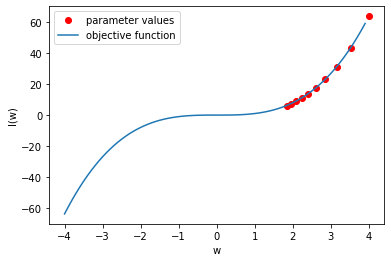

In [17]:
# Plot the model
plot_cubic(w, optimizer)

In [18]:
# Create optimizer with momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

We run several iterations of stochastic gradient descent with momentum and plot the results. We see the parameter values do not get stuck in the saddle point.


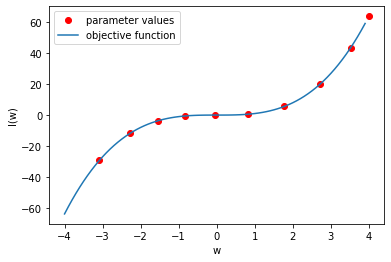

In [19]:
# Plot the model

plot_cubic(w, optimizer)

# Local Minima

In this section, we will create a fourth order polynomial with a local minimum at <i>4</i> and a global minimum a <i>-2</i>. We will then see how the momentum parameter affects convergence to a global minimum. The fourth order polynomial is given by:


In [20]:
# Create the 4th order polynominal

def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

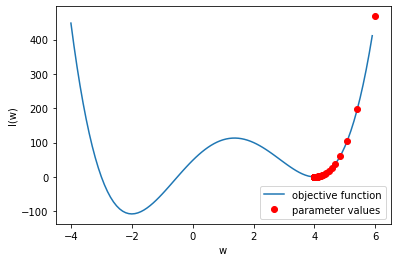

In [23]:
# Without momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

We create an optimizer with a  momentum term of 0.9. We run several iterations of stochastic gradient descent and plot the results. We see the parameter values reach a global minimum.


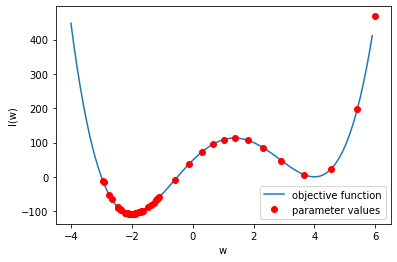

In [24]:
# With momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

# Noise

In this section, we will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2, but we will add noise to the function when the Gradient is calculated. We will then see how the momentum parameter affects convergence to a global minimum. 


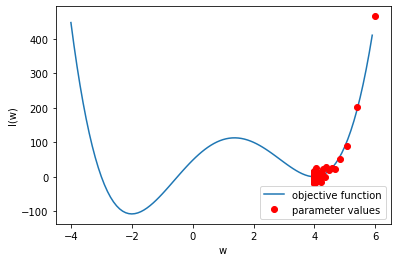

In [26]:
# Without momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

# With momentum

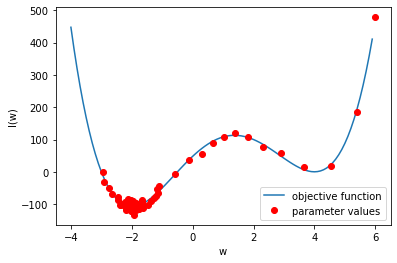

In [27]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

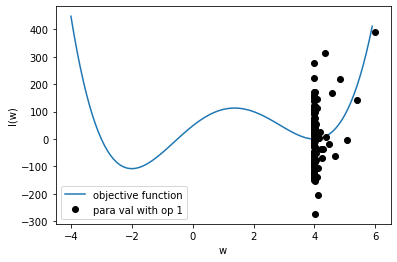

In [28]:
# Practice
optimizer1 = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer1, std=100, color='black', paramlabel='para val with op 1')

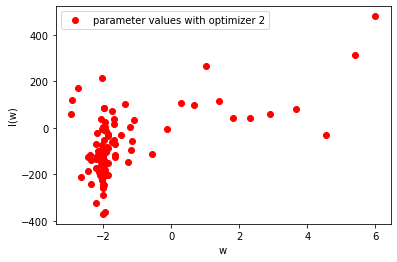

In [29]:
optimizer2 = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer2, std = 100, color = 'red', paramlabel = 'parameter values with optimizer 2', objfun = False)
